# Data Wrangling 

Med Students Learning Analytics Group  
Coded by: Kathryn Linehan, June 2018

Data Wrangling of master.csv: includes cleaning the format of a feature, deleting certain features and instances, replacing certain features with only their relevant data, and filling in missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read in the data and take a look at the first 5 instances

df = pd.read_csv("./master.csv")
pd.set_option('display.max_columns', 50)
df.head()

,student_id,m1_fall,mcat_zscore,mcat_total_attempts,bachelor_1,bachelor_2,bachelor_3,master_1,master_2,master_3,associate_1,associate_2,gem_indicator,race,race_indic,gender,m1f_limbs,m1f_metabolism_nutrition_and_endo,m1f_molecular_and_cell_physiology,m1f_molecular_and_human_genetics,m1s_cardio_pulmonary,m1s_ebm_and_population_health,m1s_gastrointestinal,m1s_head_neck_and_special_senses,m1s_medical_neuroscience,m1s_patients_populations_and_policy,m1s_physical_diagnosis_i,m1s_renal_and_electrolytes,m1s_sexual_dev__and_reproduction,m2s_clinical_skills_primer,m2s_evidence_based_medicine_ii,m2s_health_care_ethics,m2s_human_sexuality,m2s_lab_medicine_pblm_solving_case,m2s_microbiology_and_immunology,m2s_pathology,m2s_pharmacology,m2s_physical_diagnosis_ii,m2s_psychiatry,step1_raw_score,step1_z_score,step1_pass_indicator,step1_total_attempts,dropout_indic,student_classification,repeat_indic,target_indicator
0,30705306,200930,2.505529,1.0,Science,NaN,NaN,Science,NaN,NaN,NaN,NaN,0.0,White,5.0,M,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,NaN,1.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,269.0,2.178880,1.0,1.0,NaN,NaN,NaN,0
1,22721624,200930,-1.407328,2.0,Science,NaN,NaN,Science,NaN,NaN,Science,NaN,1.0,Black or African American,3.0,F,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,NaN,1.0,4.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,210.0,-0.836599,1.0,1.0,NaN,NaN,NaN,0
2,35604291,200930,0.745614,1.0,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,White,5.0,M,2.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,NaN,1.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,241.0,0.747805,1.0,1.0,NaN,NaN,NaN,0
3,23250759,200930,0.149933,1.0,Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,White,5.0,M,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,NaN,1.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,224.0,-0.121062,1.0,1.0,NaN,NaN,NaN,0
4,23269092,200930,-0.973841,1.0,Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Asian,2.0,F,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,197.0,-1.501027,1.0,1.0,NaN,NaN,NaN,0


In [3]:
df.shape

(1790, 47)

## 1. Clean the "m1_fall" feature

The format will be changed to YYYY instead of YYYY30.

In [4]:
# check that each item in "m1_fall" ends in 30.

(df['m1_fall']%100 == 30).sum()

1790

In [5]:
# change the format to YYYY instead of YYYY30

new_m1_fall = df['m1_fall']//100

# put the new YYYY format into the dataframe

df['m1_fall'] = new_m1_fall

## 2. Delete instances from 2016 and 2017

We have incomplete data for students who started in 2016 and 2017.  When we received the data during the spring 2018 semester, the 2016 class only had course grades for the M1 year and the 2017 class had no course grades at all.  Neither of these classes had attempted the STEP1 exam.  

We investigate the missing values in students from 2016 and 2017 classes.  

In [6]:
# Find the 2016 students in our dataframe
mask2016 = (df['m1_fall'] == 2016)

# Find the number of 2016 students
num_students_2016, num_features = df[mask2016].shape
print("There are %d students in the 2016 class." % num_students_2016)
print("There are %d features." % num_features)

# Calculate the sum of null values for each feature for the 2016 students
df[mask2016].isnull().sum()  


There are 196 students in the 2016 class.
There are 47 features.


student_id                               0
m1_fall                                  0
mcat_zscore                              7
mcat_total_attempts                      7
bachelor_1                               1
bachelor_2                             171
bachelor_3                             195
master_1                               143
master_2                               194
master_3                               196
associate_1                            194
associate_2                            196
gem_indicator                            0
race                                     0
race_indic                               0
gender                                   0
m1f_limbs                                7
m1f_metabolism_nutrition_and_endo       39
m1f_molecular_and_cell_physiology       38
m1f_molecular_and_human_genetics         0
m1s_cardio_pulmonary                    52
m1s_ebm_and_population_health           13
m1s_gastrointestinal                    52
m1s_head_ne

In [7]:
# Show that 2016 students have mostly missing data

# sum of null values for each student (instance)
num_missing_features_2016 = df[mask2016].isnull().sum(axis=1)  

num_missing_features_2016.describe()

count    196.000000
mean      25.229592
std        2.175232
min       22.000000
25%       24.000000
50%       24.000000
75%       27.000000
max       31.000000
dtype: float64

There are 47 features and at least 75% of 2016 students are missing at least 24 features, which is more than half of the total number of features. 

RESULT: The 2016 instances will be deleted.

NOTE: The course grades and STEP1 data for 2016 students will eventually be available from GU Medical School. One avenue of additional work on this project (after certificate completion) could be using the 2016 data to test our model from the machine learning phase. 


In [8]:
# Find the 2017 students in our dataframe.
mask2017 = (df['m1_fall'] == 2017)

# Find the number of 2017 students

num_students_2017, num_features = df[mask2017].shape
print("There are %d students in the 2017 class." % num_students_2017)
print("There are %d features." % num_features)

# Calculate the sum of null values for each feature for the 2017 students
df[mask2017].isnull().sum() 

There are 197 students in the 2017 class.
There are 47 features.


student_id                               0
m1_fall                                  0
mcat_zscore                            197
mcat_total_attempts                    197
bachelor_1                               1
bachelor_2                             168
bachelor_3                             196
master_1                               146
master_2                               193
master_3                               195
associate_1                            193
associate_2                            196
gem_indicator                            0
race                                     0
race_indic                               0
gender                                   0
m1f_limbs                              197
m1f_metabolism_nutrition_and_endo      197
m1f_molecular_and_cell_physiology      197
m1f_molecular_and_human_genetics       197
m1s_cardio_pulmonary                   197
m1s_ebm_and_population_health          197
m1s_gastrointestinal                   197
m1s_head_ne

In [9]:
# Show that 2017 students have mostly missing data 

# sum of null values for each student (instance)
num_missing_features_2017 = df[mask2017].isnull().sum(axis=1)  

num_missing_features_2017.describe()

count    197.000000
mean      38.538071
std        0.804847
min       35.000000
25%       38.000000
50%       39.000000
75%       39.000000
max       40.000000
dtype: float64

There are 47 features and all of these 2017 students are missing at least 35 features, which is about 75% of the total number of features. 

RESULT:  The 2017 instances will be deleted.

NOTE: We will be doing supervised learning methods in the machine learning phase so we need students (instances) that have the STEP1 data already.  The 2016 and 2017 students do not meet this criterion.  

In [10]:
# delete instances from 2016 and 2017 from our dataframe

#df['m1_fall'].value_counts()
mask_2009_to_2015 = (df['m1_fall'] <= 2015)
new_df = df[mask_2009_to_2015]
df = new_df

num_students, num_features = df.shape
print("The updated number of instances is %d." % num_students)
print("There are still %d features." % num_features)

The updated number of instances is 1397.
There are still 47 features.


## 3. Delete Unnecessary Features

We will not be using student_id, or step1_raw_score in our analysis. Race_indic is redundant data with race. 

RESULT: delete student_id, step1_raw_score, and race_indic features.

In [11]:
# delete the features mentioned above

df = df.drop(columns=['student_id', 'step1_raw_score', 'race_indic'])

# Updated dataframe

num_students, num_features = df.shape
print("The updated number of instances is %d." % num_students)
print("The updated number of features is %d." % num_features)

df.head()

The updated number of instances is 1397.
The updated number of features is 44.


,m1_fall,mcat_zscore,mcat_total_attempts,bachelor_1,bachelor_2,bachelor_3,master_1,master_2,master_3,associate_1,associate_2,gem_indicator,race,gender,m1f_limbs,m1f_metabolism_nutrition_and_endo,m1f_molecular_and_cell_physiology,m1f_molecular_and_human_genetics,m1s_cardio_pulmonary,m1s_ebm_and_population_health,m1s_gastrointestinal,m1s_head_neck_and_special_senses,m1s_medical_neuroscience,m1s_patients_populations_and_policy,m1s_physical_diagnosis_i,m1s_renal_and_electrolytes,m1s_sexual_dev__and_reproduction,m2s_clinical_skills_primer,m2s_evidence_based_medicine_ii,m2s_health_care_ethics,m2s_human_sexuality,m2s_lab_medicine_pblm_solving_case,m2s_microbiology_and_immunology,m2s_pathology,m2s_pharmacology,m2s_physical_diagnosis_ii,m2s_psychiatry,step1_z_score,step1_pass_indicator,step1_total_attempts,dropout_indic,student_classification,repeat_indic,target_indicator
0,2009,2.505529,1.0,Science,NaN,NaN,Science,NaN,NaN,NaN,NaN,0.0,White,M,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,NaN,1.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,2.178880,1.0,1.0,NaN,NaN,NaN,0
1,2009,-1.407328,2.0,Science,NaN,NaN,Science,NaN,NaN,Science,NaN,1.0,Black or African American,F,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,NaN,1.0,4.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,-0.836599,1.0,1.0,NaN,NaN,NaN,0
2,2009,0.745614,1.0,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,White,M,2.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,NaN,1.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,0.747805,1.0,1.0,NaN,NaN,NaN,0
3,2009,0.149933,1.0,Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,White,M,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,NaN,1.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,-0.121062,1.0,1.0,NaN,NaN,NaN,0
4,2009,-0.973841,1.0,Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Asian,F,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,-1.501027,1.0,1.0,NaN,NaN,NaN,0


## 4. Investigate features with mainly missing values

In [12]:
# Find which features have mainly missing values

df.isnull().sum()

m1_fall                                   0
mcat_zscore                              56
mcat_total_attempts                      56
bachelor_1                               21
bachelor_2                             1234
bachelor_3                             1393
master_1                               1123
master_2                               1387
master_3                               1396
associate_1                            1367
associate_2                            1394
gem_indicator                             0
race                                      0
gender                                    0
m1f_limbs                                59
m1f_metabolism_nutrition_and_endo       206
m1f_molecular_and_cell_physiology       199
m1f_molecular_and_human_genetics         16
m1s_cardio_pulmonary                    319
m1s_ebm_and_population_health            64
m1s_gastrointestinal                    323
m1s_head_neck_and_special_senses         25
m1s_medical_neuroscience        

FEATURES TO INVESTIGATE:  
bachelor_2  
bachelor_3  
master_1  
master_2  
master_3  
associate_1  
associate_2  
dropout_indic  
student_classification  
repeat_indic  

### Features: associate_1 and associate_2

Very few students have an associates degree in our data set.  In addition, once a student earns a bachelors degree after an associates, the bachelors gives us a better idea of the student's training since the bachelors degree covers the upper level (300 and 400 level) courses. 

In [13]:
# Check that students with an associates also have a bachelors degree.

mask_a2 = df['associate_2'].notnull()
print(df['associate_1'][mask_a2].isnull().sum())

mask_a1 = df['associate_1'].notnull()
print(df['bachelor_1'][mask_a1].isnull().sum())

0
0


All students with associates degrees in the data set also have bachelors degrees.

RESULT: delete associate_1 and associate_2 features.

In [14]:
# delete associate_1 and associate_2

df = df.drop(columns=['associate_1', 'associate_2'])
#df.head()

### Features: bachelor_i and master_i (i = 1,2,3)

First, we revisit the bachelors and masters descriptive statistics with the 2016 and 2017 instances deleted.

In [15]:
# Show the majors students have bachelors degrees in (up to 3 majors).  

# Bachelors degree - 1st major
bachelor_1_counts = df['bachelor_1'].value_counts()
print('Bachelors degree - 1st major')
print(bachelor_1_counts)

# Bachelors degree - 2nd major
bachelor_2_counts = df['bachelor_2'].value_counts()
print('\nBachelors degree - 2nd major')
print(bachelor_2_counts)

# Bachelors degree - 3rd major
bachelor_3_counts = df['bachelor_3'].value_counts()
print('\nBachelors degree - 3rd major')
print(bachelor_3_counts)

Bachelors degree - 1st major
Science     888
Arts        467
Other        19
Business      1
Medicine      1
Name: bachelor_1, dtype: int64

Bachelors degree - 2nd major
Arts       106
Science     55
Other        2
Name: bachelor_2, dtype: int64

Bachelors degree - 3rd major
Arts       2
Science    1
Other      1
Name: bachelor_3, dtype: int64


In [16]:
# Show the subjects that students have masters degrees in (up to 3 masters).  

# Masters degree - 1st 
master_1_counts = df['master_1'].value_counts()
print('Masters degree - 1st')
print(master_1_counts)

# Masters degree - 2nd 
master_2_counts = df['master_2'].value_counts()
print('\nMasters degree - 2nd')
print(master_2_counts)

# Masters degree - 3rd 
master_3_counts = df['master_3'].value_counts()
print('\nMasters degree - 3rd')
print(master_3_counts)


Masters degree - 1st
Science      224
Other         36
Arts          13
Education      1
Name: master_1, dtype: int64

Masters degree - 2nd
Science    5
Other      3
Arts       2
Name: master_2, dtype: int64

Masters degree - 3rd
Science    1
Name: master_3, dtype: int64


Since we are investigated medical school student data, the more relevant information about bachelors majors and masters subjects is are those majors/subjects in science or not.  

RESULT: The degree categories of Science, Arts, Other, Business, Medicine and Education can be compacted into two categories: Science and Non-science.  Arts, Other, Business, and Education will be included in Non-science. Science and Medicine will be included in Science.

The columns bachelor_i and master_i where i = 1,2,3 can be presented effectively with only four columns that capture the relevant information: 
1. number of bachelors majors
2. number of bachelors majors in Science
3. number of masters subjects
4. number of masters subjects in Science



In [17]:
# creating the four columns mentioned above

# 1. Number of bachelors majors per student
bachelors_df = df[['bachelor_1', 'bachelor_2', 'bachelor_3']].copy()
num_bachelors = bachelors_df.notnull().sum(axis=1)

# Replace 0 entries with NaN so they still show up as missing data (a bachelor's degree is a requirement
# to apply to med school).

mask_no_bachelors = (num_bachelors == 0)
num_bachelors[mask_no_bachelors] = float('NaN')


# 2. Number of bachelors majors in Science 

# Converting Medicine majors into Science majors
mask_med = (bachelors_df == 'Medicine')
bachelors_df[mask_med] = 'Science'

# Count number of science majors per student
mask_sci = (bachelors_df == 'Science')
num_science_bachelors = bachelors_df[mask_sci].notnull().sum(axis=1)

# Change the entries for students with no bachelors degree (missing data) from 0 to NaN 
num_science_bachelors[mask_no_bachelors] = float('NaN')


# 3. Number of masters subjects per student
masters_df = df[['master_1', 'master_2', 'master_3']].copy()
num_masters = masters_df.notnull().sum(axis=1)


# 4. Number of masters subjects in Science 
mask_sci = (masters_df == 'Science')
num_science_masters = masters_df[mask_sci].notnull().sum(axis=1)


In [18]:
# Delete bachelor_i and master_i where i=1,2,3 from the dataframe.  
# Add in four new bachelors/masters columns into the dataframe.

df = df.drop(columns=['bachelor_1', 'bachelor_2', 'bachelor_3', 'master_1', 'master_2', 'master_3'])

df.insert(loc=3, column='bachelors_num', value=num_bachelors)
df.insert(loc=4, column='science_bachelors_num', value=num_science_bachelors)
df.insert(loc=5, column='masters_num', value=num_masters)
df.insert(loc=6, column='science_masters_num', value=num_science_masters)


### Feauture: dropout_indic

This is a binary feature so the missing data needs to be filled in with 0 as the 1s are already included.

In [19]:
df['dropout_indic'].value_counts()

1.0    44
Name: dropout_indic, dtype: int64

In [20]:
# fill in 0 for NaN elements in dropout_indic feature

mask_di = df['dropout_indic'].isnull()
df.loc[mask_di,['dropout_indic']] = 0

### Features: student_classification and repeat_indic

These two features appear to have redundant data - repeat_indic lists if a student had to repeat a year, and student_classification lists the year a student repeated.  

In [21]:
# output values in these features

print('Student Classification')
print(df['student_classification'].value_counts())

print('\nRepeat Indicator')
print(df['repeat_indic'].value_counts())

Student Classification
M1    33
M2    30
Name: student_classification, dtype: int64

Repeat Indicator
1.0    63
Name: repeat_indic, dtype: int64


In [22]:
# check if these two features have redundant data

# check if students with data in student_classification have a repeat indicator of 1
mask_sc1 = (df['student_classification'].notnull())
print((df['repeat_indic'][mask_sc1] != 1).sum())

# check if students without data in student_classification have a repeat indicator of NaN
mask_sc2 = (df['student_classification'].isnull())
print((df['repeat_indic'][mask_sc2] == 1).sum())


0
0


These features do in fact contain redundant data.  Student classification contains more specific information than repeat indicator.

RESULT: delete repeat_indic and fill in "none" for NaN values in student_classification.  Rename student_classification to repeated_year.

In [23]:
# delete 'repeat_indic
df = df.drop(columns='repeat_indic')

# replace NaN values with 'none' in student_classification
mask_sc = df['student_classification'].isnull()
df.loc[mask_sc,['student_classification']] = 'none'

# rename student_classification' to 'repeated_year'
df = df.rename(columns={'student_classification':'repeated_year'})

#df['repeated_year'].value_counts()

In [24]:
# reorder last 6 columns columns in dataframe

#list(df)
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,37,36,35,33,34,38]
df = df.iloc[:,cols]

In [25]:
# check what the updated dataframe looks like

print(df.isnull().sum())
print("\n", df.shape)
df.head()


m1_fall                                  0
mcat_zscore                             56
mcat_total_attempts                     56
bachelors_num                           21
science_bachelors_num                   21
masters_num                              0
science_masters_num                      0
gem_indicator                            0
race                                     0
gender                                   0
m1f_limbs                               59
m1f_metabolism_nutrition_and_endo      206
m1f_molecular_and_cell_physiology      199
m1f_molecular_and_human_genetics        16
m1s_cardio_pulmonary                   319
m1s_ebm_and_population_health           64
m1s_gastrointestinal                   323
m1s_head_neck_and_special_senses        25
m1s_medical_neuroscience                24
m1s_patients_populations_and_policy    424
m1s_physical_diagnosis_i                24
m1s_renal_and_electrolytes             333
m1s_sexual_dev__and_reproduction       217
m2s_clinica

,m1_fall,mcat_zscore,mcat_total_attempts,bachelors_num,science_bachelors_num,masters_num,science_masters_num,gem_indicator,race,gender,m1f_limbs,m1f_metabolism_nutrition_and_endo,m1f_molecular_and_cell_physiology,m1f_molecular_and_human_genetics,m1s_cardio_pulmonary,m1s_ebm_and_population_health,m1s_gastrointestinal,m1s_head_neck_and_special_senses,m1s_medical_neuroscience,m1s_patients_populations_and_policy,m1s_physical_diagnosis_i,m1s_renal_and_electrolytes,m1s_sexual_dev__and_reproduction,m2s_clinical_skills_primer,m2s_evidence_based_medicine_ii,m2s_health_care_ethics,m2s_human_sexuality,m2s_lab_medicine_pblm_solving_case,m2s_microbiology_and_immunology,m2s_pathology,m2s_pharmacology,m2s_physical_diagnosis_ii,m2s_psychiatry,repeated_year,dropout_indic,step1_total_attempts,step1_z_score,step1_pass_indicator,target_indicator
0,2009,2.505529,1.0,1.0,1.0,1,1,0.0,White,M,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,NaN,1.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,none,0.0,1.0,2.178880,1.0,0
1,2009,-1.407328,2.0,1.0,1.0,1,1,1.0,Black or African American,F,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,NaN,1.0,4.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,none,0.0,1.0,-0.836599,1.0,0
2,2009,0.745614,1.0,1.0,0.0,0,0,0.0,White,M,2.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,NaN,1.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,none,0.0,1.0,0.747805,1.0,0
3,2009,0.149933,1.0,1.0,1.0,0,0,0.0,White,M,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,NaN,1.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,none,0.0,1.0,-0.121062,1.0,0
4,2009,-0.973841,1.0,1.0,1.0,0,0,1.0,Asian,F,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,none,0.0,1.0,-1.501027,1.0,0


## 5. Investigate instances missing feature data

count    1397.000000
mean        2.177523
std         3.708193
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        27.000000
dtype: float64


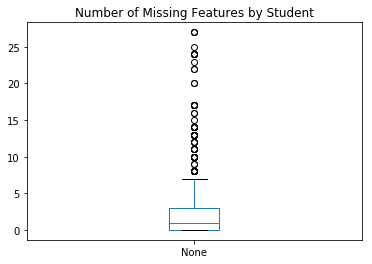

In [26]:
# Show overall picture of how many students are missing how much feature data

missing_data_by_student = df.isnull().sum(axis=1)
print(missing_data_by_student.describe())
missing_data_by_student.plot(kind='box')
plt.title("Number of Missing Features by Student");

Most students are missing very few features if any at all, but there are some who are missing many features. The first group of students we will investigate are the students who are missing a STEP1 z-score as the STEP1 z-score is what we are trying to predict in the machine learning phase.

We are doing supervised learning so will need to delete these instances.  However we will also investigate if the students missing STEP1 are students who dropped out or not.  In addition, a possible avenue of future work for this project (after certificate completion) is using the students who dropped out as test data for our machine learning model to predict if these students would have passed STEP1 had they not dropped out.

### Students who are missing a STEP1 z-score

In [27]:
# check how many students are missing step1 z-score
print("%d students are missing the step1 z-score." % (df['step1_z_score'].isnull().sum()))

# check how many students dropped out
num_students, num_features = df.shape
num_drop = (df['dropout_indic'].sum())
print("%d students dropped out." % num_drop)
print("This is %.2f%% of the total number of students." % (num_drop/num_students))


44 students are missing the step1 z-score.
44 students dropped out.
This is 0.03% of the total number of students.


In [28]:
# Are the students who are missing the step1 z-score the same students who dropped out?

mask_no_step1 = (df['step1_z_score'].isnull())
print(df[mask_no_step1]['dropout_indic'].sum())
print(df[mask_no_step1]['step1_total_attempts'].isnull().sum())
print(df[mask_no_step1]['step1_pass_indicator'].isnull().sum())

44.0
44
44


There were 44 students who dropped out and there were 44 students missing the step1_z_score feature, the step1_total_attempts feature, and the step1_pass_indicator feature. The code above shows that the students who dropped out are the same students who were missing each of these features.

CONCLUSION: The students who dropped out did not attempt STEP1.  Every other student (from classes 2009-2015) did attempt STEP1.  


count    44.000000
mean     15.500000
std       6.468169
min       3.000000
25%      13.000000
50%      14.000000
75%      20.500000
max      27.000000
dtype: float64


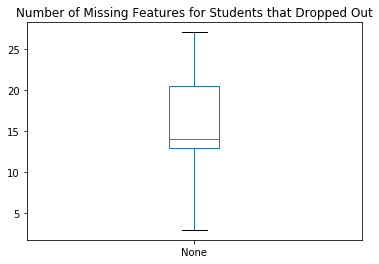

In [29]:
# Check how much total data is missing from students who dropped out

#df[mask_no_step1][:].isnull().sum(axis=1)
print(df[mask_no_step1][:].isnull().sum(axis=1).describe())
df[mask_no_step1][:].isnull().sum(axis=1).plot(kind='box')
plt.title("Number of Missing Features for Students that Dropped Out");

We have concluded that the students who did drop out were the only students (from classes 2009-2015) who did not attempt STEP1 and have missing data for STEP1.  Very few students in GU medical school drop out, but at least 75% of the students who did drop out are missing at least a third of the feature data.  

RESULT: delete the instances for students who have missing STEP1 data/dropped out.

In [30]:
# delete instances for students who are missing STEP1 data/dropped out

#df[mask_no_step1][:]
labels = df[mask_no_step1][:].index.tolist()
df = df.drop(labels, axis=0)

In [31]:
# updated df['dropout_indic'] overview

print(df['dropout_indic'].sum())
df['dropout_indic'].value_counts()

0.0


0.0    1353
Name: dropout_indic, dtype: int64

The dropout_indic feature post removal of students who dropped out contains all 0s.  So it no longer contains relevant data.

RESULT: delete dropout_indic

In [32]:
# delete dropout_indic

df = df.drop(columns=['dropout_indic'])

### Students who are missing other feature data

m1_fall                                  0
mcat_zscore                             56
mcat_total_attempts                     56
bachelors_num                           19
science_bachelors_num                   19
masters_num                              0
science_masters_num                      0
gem_indicator                            0
race                                     0
gender                                   0
m1f_limbs                               50
m1f_metabolism_nutrition_and_endo      203
m1f_molecular_and_cell_physiology      199
m1f_molecular_and_human_genetics         8
m1s_cardio_pulmonary                   299
m1s_ebm_and_population_health           49
m1s_gastrointestinal                   304
m1s_head_neck_and_special_senses        12
m1s_medical_neuroscience                11
m1s_patients_populations_and_policy    403
m1s_physical_diagnosis_i                10
m1s_renal_and_electrolytes             311
m1s_sexual_dev__and_reproduction       204
m2s_clinica

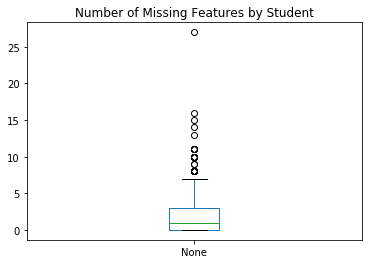

In [33]:
# check what missing data remains

# by feature
print(df.isnull().sum())

# by student
print("\nNumber of missing features by student\n")
num_missing_features = df.isnull().sum(axis=1)
print(num_missing_features.describe())
num_missing_features.plot(kind='box')
plt.title("Number of Missing Features by Student");


In [34]:
# calculate an outlier threshold

outlier_threshold = num_missing_features.mean() + 3*num_missing_features.std()
print('Outlier threshold for number of missing features by student: %.2f' % outlier_threshold)

Outlier threshold for number of missing features by student: 9.63


Most students are missing very few features if any at all, but there are some who are missing 10 or more features. 10 is more than 3 standard deviations from the mean for the number of missing features by student, so these students are outliers.  

RESULT: delete the instances missing data in 10 or more features. 

In [35]:
# calculate how many instances will be deleted

print((df.isnull().sum(axis=1) >= 10).sum())

# delete these instances
mask_missing = (df.isnull().sum(axis=1) >= 10)
labels = df[mask_missing][:].index.tolist()
df = df.drop(labels, axis=0)

17


In [36]:
# check what updated dataframe looks like

print(df.shape)
df.head()

(1336, 38)


,m1_fall,mcat_zscore,mcat_total_attempts,bachelors_num,science_bachelors_num,masters_num,science_masters_num,gem_indicator,race,gender,m1f_limbs,m1f_metabolism_nutrition_and_endo,m1f_molecular_and_cell_physiology,m1f_molecular_and_human_genetics,m1s_cardio_pulmonary,m1s_ebm_and_population_health,m1s_gastrointestinal,m1s_head_neck_and_special_senses,m1s_medical_neuroscience,m1s_patients_populations_and_policy,m1s_physical_diagnosis_i,m1s_renal_and_electrolytes,m1s_sexual_dev__and_reproduction,m2s_clinical_skills_primer,m2s_evidence_based_medicine_ii,m2s_health_care_ethics,m2s_human_sexuality,m2s_lab_medicine_pblm_solving_case,m2s_microbiology_and_immunology,m2s_pathology,m2s_pharmacology,m2s_physical_diagnosis_ii,m2s_psychiatry,repeated_year,step1_total_attempts,step1_z_score,step1_pass_indicator,target_indicator
0,2009,2.505529,1.0,1.0,1.0,1,1,0.0,White,M,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,NaN,1.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,none,1.0,2.178880,1.0,0
1,2009,-1.407328,2.0,1.0,1.0,1,1,1.0,Black or African American,F,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,NaN,1.0,4.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,none,1.0,-0.836599,1.0,0
2,2009,0.745614,1.0,1.0,0.0,0,0,0.0,White,M,2.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,NaN,1.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,none,1.0,0.747805,1.0,0
3,2009,0.149933,1.0,1.0,1.0,0,0,0.0,White,M,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,NaN,1.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,none,1.0,-0.121062,1.0,0
4,2009,-0.973841,1.0,1.0,1.0,0,0,1.0,Asian,F,2.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,none,1.0,-1.501027,1.0,0


## 6. Fill in remaining missing values

No more features or instances will be deleted.  At this point, we use statistics to help us choose how to fill in the remaining missing values in the data.

In [37]:
# check what data is still missing

df.isnull().sum()

m1_fall                                  0
mcat_zscore                             53
mcat_total_attempts                     53
bachelors_num                           16
science_bachelors_num                   16
masters_num                              0
science_masters_num                      0
gem_indicator                            0
race                                     0
gender                                   0
m1f_limbs                               45
m1f_metabolism_nutrition_and_endo      199
m1f_molecular_and_cell_physiology      195
m1f_molecular_and_human_genetics         4
m1s_cardio_pulmonary                   293
m1s_ebm_and_population_health           44
m1s_gastrointestinal                   298
m1s_head_neck_and_special_senses         7
m1s_medical_neuroscience                 7
m1s_patients_populations_and_policy    394
m1s_physical_diagnosis_i                 6
m1s_renal_and_electrolytes             305
m1s_sexual_dev__and_reproduction       198
m2s_clinica

### Features: mcat_zscore, mcat_total_attempts 

MCAT z-score
count    1283.000000
mean        0.310991
std         0.819952
min        -2.911583
25%        -0.007184
50%         0.342969
75%         0.822231
max         3.012828
Name: mcat_zscore, dtype: float64

MCAT total attempts
count    1283.000000
mean        1.394388
std         0.525808
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: mcat_total_attempts, dtype: float64
1.0    796
2.0    473
3.0      9
4.0      5
Name: mcat_total_attempts, dtype: int64


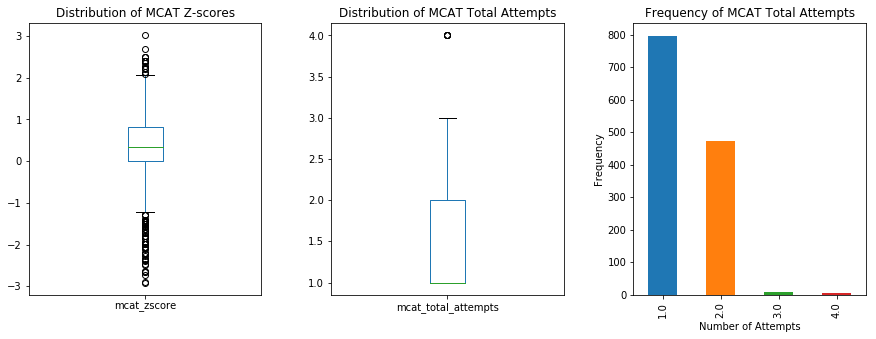

In [38]:
# Find distribution of mcat_zscore and mcat_total_attempts

print("MCAT z-score")
print(df['mcat_zscore'].describe())

print("\nMCAT total attempts")
print(df['mcat_total_attempts'].describe())
print(df['mcat_total_attempts'].value_counts())

# plot both distributions

fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,3,1)
df['mcat_zscore'].plot(kind='box')
plt.title("Distribution of MCAT Z-scores");

plt.subplot(1,3,2)
df['mcat_total_attempts'].plot(kind='box')
plt.title("Distribution of MCAT Total Attempts");

plt.subplot(1,3,3)
df['mcat_total_attempts'].value_counts().plot(kind='bar')
plt.title("Frequency of MCAT Total Attempts");
plt.xlabel("Number of Attempts");
plt.ylabel("Frequency");

MCAT z-score: The range of data from the minimum to the 1st quartile is larger than the range of data from the 3rd quartile to the maximum.  Also, it appears from the box plot that there are more outliers below the 1st quartile than above the 3rd quartile.  The mean will be sensitive to these properties so we choose to fill in the missing data in the mcat_zscore with the median value.

MCAT total attempts: At least 50% of the students took the MCAT one time.  The mean will be sensitive to the fact that there is a larger range from the median to the maximum value than from the median to the minimum value.  Also, this is discrete data, so we note that the mode is 1.  So we choose to fill in the missing data in mcat_total_attempts with the median/mode value of 1.  

RESULT: Fill in missing values in mcat_zscore and mcat_total_attempts with their respective median values.

In [39]:
# Fill in missing values with the median

mcat_med = df['mcat_zscore'].median()
df['mcat_zscore'] = df['mcat_zscore'].fillna(mcat_med)

mcat_att_med = df['mcat_total_attempts'].median()
df['mcat_total_attempts'] = df['mcat_total_attempts'].fillna(mcat_att_med)

### Features: bachelors_num, science_bachelors_num

Number of Bachelors
count    1320.000000
mean        1.122727
std         0.337361
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: bachelors_num, dtype: float64
1.0    1162
2.0     154
3.0       4
Name: bachelors_num, dtype: int64

Number of Science Bachelors
count    1320.000000
mean        0.684848
std         0.509870
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: science_bachelors_num, dtype: float64
1.0    846
0.0    445
2.0     29
Name: science_bachelors_num, dtype: int64


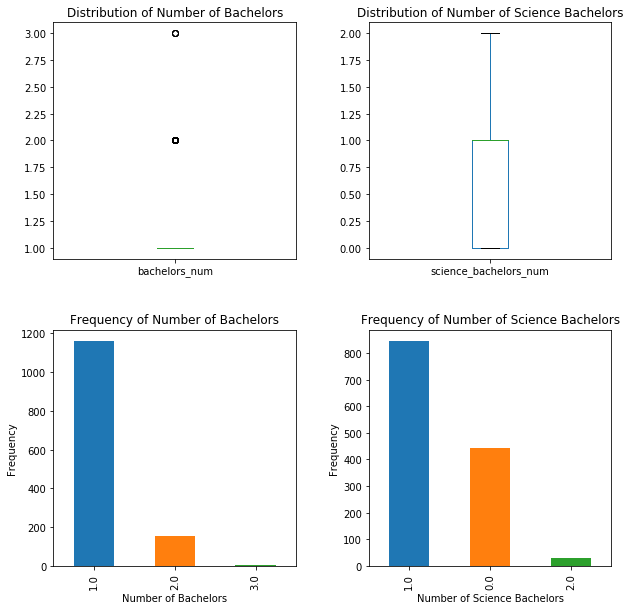

In [40]:
# Find distribution of features

print("Number of Bachelors")
print(df['bachelors_num'].describe())
print(df['bachelors_num'].value_counts())

print("\nNumber of Science Bachelors")
print(df['science_bachelors_num'].describe())
print(df['science_bachelors_num'].value_counts())

# plot both distributions

fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,2,1)
df['bachelors_num'].plot(kind='box')
plt.title("Distribution of Number of Bachelors");

plt.subplot(2,2,2)
df['science_bachelors_num'].plot(kind='box')
plt.title("Distribution of Number of Science Bachelors");

plt.subplot(2,2,3)
df['bachelors_num'].value_counts().plot(kind='bar')
plt.title("Frequency of Number of Bachelors");
plt.xlabel("Number of Bachelors");
plt.ylabel("Frequency");

plt.subplot(2,2,4)
df['science_bachelors_num'].value_counts().plot(kind='bar')
plt.title("Frequency of Number of Science Bachelors");
plt.xlabel("Number of Science Bachelors");
plt.ylabel("Frequency");

Number of Bachelors: More than 75% of students have one bachelors degree (1 is the minimum and 75% percentile).  In addition, this is discrete data and the mode is 1 as well.  So, we will fill the missing values in this column with the median/mode of 1.

Number of Science Bachelors: This is discrete data and the majority of students have 1 bachelors in science (ie. the mode is 1).  Many more students have 0 science bachelors instead of 2.  The mean is sensitive to this and is not the best measure of central tendency.  We will fill in the missing values in this column with the median/mode of 1.

RESULT: fill in missing values in bachelors_num and science_bachelors_num with their respective median values.

In [41]:
# Fill in missing values with the median

bachelors_med = df['bachelors_num'].median()
df['bachelors_num'] = df['bachelors_num'].fillna(bachelors_med)

sci_bachelors_med = df['science_bachelors_num'].median()
df['science_bachelors_num'] = df['science_bachelors_num'].fillna(sci_bachelors_med)

### Features: Course Grades

To fill in the missing course grades we use the following strategy.

1. Calculate each student's GPA from the non-missing course data.
2. Calculate the percentile of each student's GPA out of the distribution of GPAs.  Call this GPA_percentile.
3. Fill in missing grade for student x, in course y, by choosing x's GPA_percentile-th percentile of the grade distribution for course y.

For example, if student x has a GPA that is the 40th percentile, then we fill in x's missing grade for course y using the 40th percentile of the distribution of y's course grades. 

In [42]:
# 1. calculate GPA for each student from the non-missing course data

course_grades = df.loc[:,'m1f_limbs':'m2s_psychiatry']
GPA = course_grades.mean(axis=1)
#GPA.shape

In [43]:
# 2. calculate GPA percentile for each student

GPA_percentile = GPA.rank(method='max',pct=True)

We print out the course grade distributions for reference before we complete Step 3 from above.

In [44]:
# course grade distributions

course_grades.describe()

,m1f_limbs,m1f_metabolism_nutrition_and_endo,m1f_molecular_and_cell_physiology,m1f_molecular_and_human_genetics,m1s_cardio_pulmonary,m1s_ebm_and_population_health,m1s_gastrointestinal,m1s_head_neck_and_special_senses,m1s_medical_neuroscience,m1s_patients_populations_and_policy,m1s_physical_diagnosis_i,m1s_renal_and_electrolytes,m1s_sexual_dev__and_reproduction,m2s_clinical_skills_primer,m2s_evidence_based_medicine_ii,m2s_health_care_ethics,m2s_human_sexuality,m2s_lab_medicine_pblm_solving_case,m2s_microbiology_and_immunology,m2s_pathology,m2s_pharmacology,m2s_physical_diagnosis_ii,m2s_psychiatry
count,1291.000000,1137.000000,1141.000000,1332.000000,1043.000000,1292.000000,1038.000000,1329.000000,1329.000000,942.000000,1330.0,1031.000000,1138.000000,1334.000000,1336.000000,1333.000000,1335.000000,1334.000000,1335.000000,1334.000000,1335.000000,1333.000000,1334.000000
mean,2.444617,2.678980,2.628396,2.545420,2.573346,2.606037,2.743738,2.628292,2.498119,2.799363,1.0,3.077595,2.662566,2.649175,2.773952,2.972993,2.858427,2.424288,2.592884,2.428786,2.416854,1.204051,2.518741
std,0.757797,0.790473,0.779361,0.782991,0.774559,0.795014,0.822674,0.802095,0.778449,0.734080,0.0,0.834797,0.756342,0.671918,0.741359,0.804934,0.812313,0.724066,0.737709,0.699767,0.744430,0.577674,0.735465
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.0,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


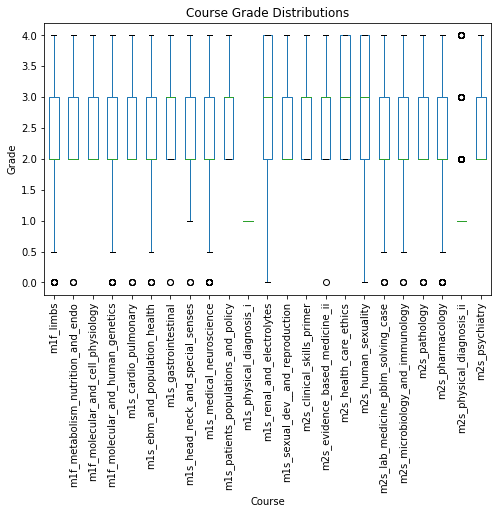

In [45]:
# plot course grades distributions

course_grades.plot(kind='box', figsize=(8,5))
plt.xticks(rotation=90);
plt.title('Course Grade Distributions');
plt.ylabel('Grade')
plt.xlabel('Course');

In [46]:
# 3. Fill in missing values in course grades data

# Calculate course grades for all students in all courses based on their GPA_percentile and the course grades
# distribution.
calculated_grades = course_grades.quantile(GPA_percentile)

# change indices of calculated_grades to match those of course_grades
calculated_grades.index = course_grades.index.tolist()   

# Fill in NaN values in course grades with the calculated course grades based on GPA_percentile and course grades
# distribution
course_grades = course_grades.where(course_grades.notnull(), other=calculated_grades)


In [47]:
# insert updated course_grades back into dataframe

df.loc[:,'m1f_limbs':'m2s_psychiatry'] = course_grades

## 7. Conclusions

In [48]:
# missing values check

print(df.isnull().sum())

m1_fall                                0
mcat_zscore                            0
mcat_total_attempts                    0
bachelors_num                          0
science_bachelors_num                  0
masters_num                            0
science_masters_num                    0
gem_indicator                          0
race                                   0
gender                                 0
m1f_limbs                              0
m1f_metabolism_nutrition_and_endo      0
m1f_molecular_and_cell_physiology      0
m1f_molecular_and_human_genetics       0
m1s_cardio_pulmonary                   0
m1s_ebm_and_population_health          0
m1s_gastrointestinal                   0
m1s_head_neck_and_special_senses       0
m1s_medical_neuroscience               0
m1s_patients_populations_and_policy    0
m1s_physical_diagnosis_i               0
m1s_renal_and_electrolytes             0
m1s_sexual_dev__and_reproduction       0
m2s_clinical_skills_primer             0
m2s_evidence_bas

No more missing data!!  

In the statistical analysis, we will perform an outlier analysis and then make decisions on what to do with any outlier data (keep it or change it to a different value).  There is the potential for outliers especially in MCAT z-score and STEP1 z-score.

After the wrangling process, we have updated our original problem/target.  We note the following:
- The feature repeated_year is a predictor, not part of the target.  A student can repeat a year and still pass STEP1.
- The students who dropped out were deleted from the data set as none of these students had taken STEP1. (All other students from classes 2009-2015 took STEP1.)  
- Our target is therefore predicting STEP1 z-scores, not just STEP1 pass/fail.  Possible machine learning techniques include regression to predict STEP1 z-scores and classification to predict STEP1 z-score "buckets".  For example, we could classify STEP1 z-scores by using the three categories: below -1, between -1 and 1, and above 1.  The categories will be chosen during the statistical analysis. 

The target_indicator feature is a binary feature that contains a 1 if a student dropped out, repeated a year, or did not pass STEP1. We no longer need this information.

RESULT: delete target_indicator feature.  

In [49]:
# drop target_indicator feature

df = df.drop(columns=['target_indicator'])

# updated dataframe overview
print(df.shape)
df.head()

(1336, 37)


,m1_fall,mcat_zscore,mcat_total_attempts,bachelors_num,science_bachelors_num,masters_num,science_masters_num,gem_indicator,race,gender,m1f_limbs,m1f_metabolism_nutrition_and_endo,m1f_molecular_and_cell_physiology,m1f_molecular_and_human_genetics,m1s_cardio_pulmonary,m1s_ebm_and_population_health,m1s_gastrointestinal,m1s_head_neck_and_special_senses,m1s_medical_neuroscience,m1s_patients_populations_and_policy,m1s_physical_diagnosis_i,m1s_renal_and_electrolytes,m1s_sexual_dev__and_reproduction,m2s_clinical_skills_primer,m2s_evidence_based_medicine_ii,m2s_health_care_ethics,m2s_human_sexuality,m2s_lab_medicine_pblm_solving_case,m2s_microbiology_and_immunology,m2s_pathology,m2s_pharmacology,m2s_physical_diagnosis_ii,m2s_psychiatry,repeated_year,step1_total_attempts,step1_z_score,step1_pass_indicator
0,2009,2.505529,1.0,1.0,1.0,1,1,0.0,White,M,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,none,1.0,2.178880,1.0
1,2009,-1.407328,2.0,1.0,1.0,1,1,1.0,Black or African American,F,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,1.0,4.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,none,1.0,-0.836599,1.0
2,2009,0.745614,1.0,1.0,0.0,0,0,0.0,White,M,2.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,1.0,2.0,none,1.0,0.747805,1.0
3,2009,0.149933,1.0,1.0,1.0,0,0,0.0,White,M,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,none,1.0,-0.121062,1.0
4,2009,-0.973841,1.0,1.0,1.0,0,0,1.0,Asian,F,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,none,1.0,-1.501027,1.0
